<a href="https://colab.research.google.com/github/SergioMoraa/Taller_Tam/blob/main/DL_Basic_KerasAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Deep Learning básico:

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import time

# --- Carga y preprocesamiento de datos (ejecutar una vez) ---
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Dividir en validación y entrenamiento, y escalar
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# --- Definición del modelo (para recrearlo en cada iteración) ---
def create_model():
    keras.backend.clear_session() # Limpia la sesión anterior
    np.random.seed(42)
    tf.random.set_seed(42)

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd", # Puedes probar con keras.optimizers.SGD(learning_rate=1e-3) como en tu ejemplo de regresión si lo prefieres
                  metrics=["accuracy"])
    return model

# --- Parámetros del experimento ---
batch_sizes_to_test = [32, 64, 128, 256, 512]
epochs = 10 # Número de épocas para entrenar

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Deep Learning básico: GPU

In [ ]:
# --- Almacenamiento de resultados para GPU ---
results_gpu = []

print("--- Iniciando experimento con GPU ---")
for batch_s in batch_sizes_to_test:
    print(f"\nEntrenando con batch_size: {batch_s} (GPU)")

    model_gpu = create_model() # Crear un nuevo modelo para cada batch_size

    start_time = time.time()
    history = model_gpu.fit(X_train, y_train, epochs=epochs, batch_size=batch_s,
                        validation_data=(X_valid, y_valid), verbose=0) # verbose=0 para menos salida, 1 o 2 para más
    end_time = time.time()

    total_training_time = end_time - start_time
    avg_epoch_time = total_training_time / epochs

    # Evaluar en el conjunto de test
    loss, accuracy = model_gpu.evaluate(X_test, y_test, verbose=0)

    results_gpu.append({
        "batch_size": batch_s,
        "test_loss": loss,
        "test_accuracy": accuracy,
        "avg_epoch_time_s": avg_epoch_time
    })
    print(f"Batch Size: {batch_s} -> Test Acc: {accuracy:.4f}, Avg Epoch Time: {avg_epoch_time:.2f}s")

# --- Mostrar tabla de resultados para GPU ---
df_results_gpu = pd.DataFrame(results_gpu)
print("\n--- Resultados del Experimento con GPU ---")
print(df_results_gpu)

--- Iniciando experimento con GPU ---

Entrenando con batch_size: 32 (GPU)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Batch Size: 32 -> Test Acc: 0.8645, Avg Epoch Time: 8.37s

Entrenando con batch_size: 64 (GPU)
Batch Size: 64 -> Test Acc: 0.8455, Avg Epoch Time: 5.03s

Entrenando con batch_size: 128 (GPU)
Batch Size: 128 -> Test Acc: 0.8406, Avg Epoch Time: 3.35s

Entrenando con batch_size: 256 (GPU)
Batch Size: 256 -> Test Acc: 0.8266, Avg Epoch Time: 2.87s

Entrenando con batch_size: 512 (GPU)
Batch Size: 512 -> Test Acc: 0.8066, Avg Epoch Time: 2.63s

--- Resultados del Experimento con GPU ---
   batch_size  test_loss  test_accuracy  avg_epoch_time_s
0          32   0.382967         0.8645          8.368723
1          64   0.433989         0.8455          5.031596
2         128   0.457573         0.8406          3.354617
3         256   0.505788         0.8266          2.874552
4         512   0.571203         0.8066          2.632763


In [ ]:
!pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 85.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 116.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 101.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 122.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 6.4 MB/s eta 0:00:00


Deep Learning básico: TPU

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import time

# --- Carga y preprocesamiento de datos (ejecutar una vez) ---
# Assuming this data loading is already done in a previous cell that has been run
# If not, uncomment the following lines:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

# Dividir en validación y entrenamiento, y escalar
# Assuming this preprocessing is already done in a previous cell that has been run
# If not, uncomment the following lines:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# --- Definición del modelo (para recrearlo en cada iteración) ---
def create_model():
    keras.backend.clear_session() # Limpia la sesión anterior
    np.random.seed(42)
    tf.random.set_seed(42)

    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(300, activation="relu"),
        keras.layers.Dense(100, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer="sgd", # Puedes probar con keras.optimizers.SGD(learning_rate=1e-3) como en tu ejemplo de regresión si lo prefieres
                  metrics=["accuracy"])
    return model

# --- Parámetros del experimento ---
batch_sizes_to_test = [32, 64, 128, 256, 512]
epochs = 10 # Número de épocas para entrenar


# --- Verificar disponibilidad de TPU (opcional pero recomendado) ---
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # Detecta la TPU
    print('Running on TPU ', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.TPUStrategy(tpu)
    print("TPU Estrategia lista.")
    # Para usar la estrategia, el modelo debe ser creado y compilado DENTRO del scope de la estrategia:
    # with strategy.scope():
    #   model_tpu = create_model()
    # Sin embargo, para modelos secuenciales simples, Keras suele manejarlo bien
    # incluso sin el scope explícito si la TPU está activa.
    # Vamos a probar sin el scope explícito primero para mantenerlo simple,
    # ya que create_model() ya compila. Si da problemas, se añade el scope.
except ValueError:
    print("TPU no encontrada. Asegúrate de que el entorno de ejecución esté configurado para TPU.")
    strategy = tf.distribute.get_strategy() # Default strategy

# --- Almacenamiento de resultados para TPU ---
results_tpu = []

print("\n--- Iniciando experimento con TPU ---")
for batch_s in batch_sizes_to_test:
    print(f"\nEntrenando con batch_size: {batch_s} (TPU)")

    # Si usas strategy.scope(), la creación del modelo va aquí dentro:
    # with strategy.scope():
    #    model_tpu = create_model()
    # Si no, Keras intentará usar la TPU automáticamente:
    model_tpu = create_model() # Crear un nuevo modelo para cada batch_size

    start_time = time.time()
    history = model_tpu.fit(X_train, y_train, epochs=epochs, batch_size=batch_s,
                        validation_data=(X_valid, y_valid), verbose=0)
    end_time = time.time()

    total_training_time = end_time - start_time
    avg_epoch_time = total_training_time / epochs

    # Evaluar en el conjunto de test
    loss, accuracy = model_tpu.evaluate(X_test, y_test, verbose=0)

    results_tpu.append({
        "batch_size": batch_s,
        "test_loss": loss,
        "test_accuracy": accuracy,
        "avg_epoch_time_s": avg_epoch_time
    })
    print(f"Batch Size: {batch_s} -> Test Acc: {accuracy:.4f}, Avg Epoch Time: {avg_epoch_time:.2f}s")

# --- Mostrar tabla de resultados para TPU ---
df_results_tpu = pd.DataFrame(results_tpu)
print("\n--- Resultados del Experimento con TPU ---")
print(df_results_tpu)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
TPU no encontrada. Asegúrate de que el entorno de ejecución esté configurado para TPU.

--- Iniciando experimento con TPU ---

Entrenando con batch_size: 32 (TPU)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Batch Size: 32 -> Test Acc: 0.8614, Avg Epoch Time: 4.93s

Entrenando con batch_size: 64 (TPU)
Batch Size: 64 -> Test Acc: 0.8409, Avg Epoch Time: 4.36s

Entrenando con batch_size: 128 (TPU)
Batch Size: 128 -> Test Acc: 0.8388, Avg Epoch Time: 2.80s

Entrenando con batch_size: 256 (TPU)
Batch Size: 256 -> Test Acc: 0.8273, Avg Epoch Time: 3.95s

Entrenando con batch_size: 512 (TPU)
Batch Size: 512 -> Test Acc: 0.8041, Avg Epoch Time: 3.62s

--- Resultados del Experimento con TPU ---
   batch_size  test_loss  test_accuracy  avg_epoch_time_s
0          32   0.385634         0.8614          4.932851
1          64   0.445900         0.8409          4.356562
2         128   0.457006         0.8388          2.801954
3         256   0.502180         0.8273          3.951451
4         512   0.569279         0.8041          3.615657


Deep Learning - Keras API funcional:

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Shapes MNIST: Train: (50000, 28, 28, 1), Valid: (10000, 28, 28, 1), Test: (10000, 28, 28, 1)


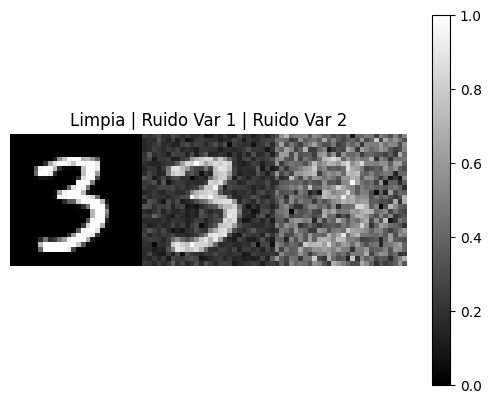

Ejemplo y_train_digits[0]: 3, ytrain_parity[0]: 1.0


Model: "multi_input_multi_output_cnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_clean_image   │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noisy_image_… │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noisy_image_… │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_conv1         │ (None, 28, 28,    │        320 │ input_clean_imag… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_conv1        │ (None, 28, 28,    │        320 │ input_noisy_imag… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_conv1        │ (None, 28, 28,    │        320 │ input_noisy_imag… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_pool1         │ (None, 14, 14,    │          0 │ clean_conv1[0][0] │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_pool1        │ (None, 14, 14,    │          0 │ noisy1_conv1[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_pool1        │ (None, 14, 14,    │          0 │ noisy2_conv1[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_conv2         │ (None, 14, 14,    │     18,496 │ clean_pool1[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_conv2        │ (None, 14, 14,    │     18,496 │ noisy1_pool1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_conv2        │ (None, 14, 14,    │     18,496 │ noisy2_pool1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_pool2         │ (None, 7, 7, 64)  │          0 │ clean_conv2[0][0] │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_pool2        │ (None, 7, 7, 64)  │          0 │ noisy1_conv2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_pool2        │ (None, 7, 7, 64)  │          0 │ noisy2_conv2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_flatten       │ (None, 3136)      │          0 │ clean_pool2[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_flatten      │ (None, 3136)      │          0 │ noisy1_pool2[0][

 Total params: 1,262,219 (4.81 MB)

 Trainable params: 1,262,219 (4.81 MB)

 Non-trainable params: 0 (0.00 B)

You must install pydot (`pip install pydot`) for `plot_model` to work.

Entrenando el modelo CNN multi-entrada/salida...
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 169s 212ms/step - loss: 0.7084 - output_digit_pred_accuracy: 0.8154 - output_digit_pred_loss: 0.5785 - output_parity_pred_accuracy: 0.8784 - output_parity_pred_loss: 0.2598 - val_loss: 0.0838 - val_output_digit_pred_accuracy: 0.9811 - val_output_digit_pred_loss: 0.0654 - val_output_parity_pred_accuracy: 0.9880 - val_output_parity_pred_loss: 0.0360
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 209ms/step - loss: 0.1377 - output_digit_pred_accuracy: 0.9677 - output_digit_pred_loss: 0.1095 - output_parity_pred_accuracy: 0.9801 - output_parity_pred_loss: 0.0565 - val_loss: 0.0715 - val_output_digit_pred_accuracy: 0.9835 - val_output_digit_pred_loss: 0.0571 - val_output_parity_pred_accuracy: 0.9907 - val_output_parity_pred_loss: 0.0281
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 164s 209ms/step - loss: 0.0952 - output_digit_pred_accuracy

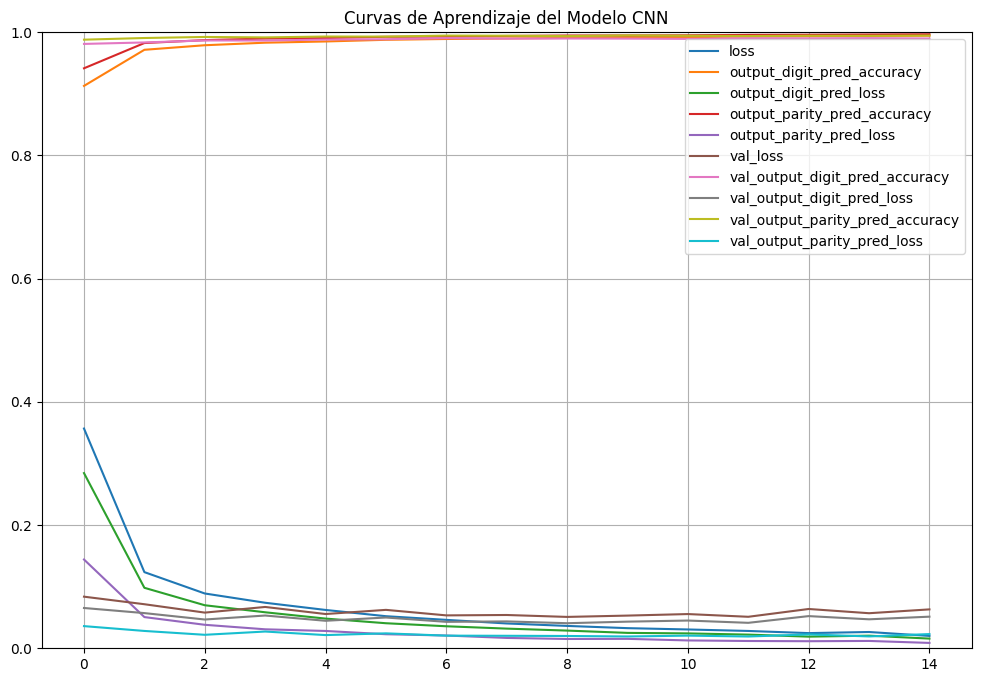

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step

Ejemplo de predicción - Dígito Real: 7, Predicho: 7
Ejemplo de predicción - Paridad Real: 1.0, Predicho: 1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# --- Carga y preprocesamiento de datos MNIST (de tu celda [23] y [24]) ---
# Esto asume que las celdas [23] y [24] ya se ejecutaron.
# (X_train_digits, y_train_digits), (X_test_digits, y_test_digits) = tf.keras.datasets.mnist.load_data()
# X_train_digits, X_valid_digits = X_train_digits[:-55000], X_train_digits[-55000:] # Esto es incorrecto, debería ser un split menor. Ej: 50000/10000
# y_train_digits, y_valid_digits = y_train_digits[:-55000], y_train_digits[-55000:]

# Corregir el split de datos MNIST para un tamaño de entrenamiento razonable
(X_train_full_digits, y_train_full_digits), (X_test_digits, y_test_digits) = tf.keras.datasets.mnist.load_data()
X_valid_digits, X_train_digits = X_train_full_digits[:10000], X_train_full_digits[10000:]
y_valid_digits, y_train_digits = y_train_full_digits[:10000], y_train_full_digits[10000:]


X_train_digits = X_train_digits[..., np.newaxis]/255.
X_valid_digits = X_valid_digits[..., np.newaxis]/255.
X_test_digits = X_test_digits[..., np.newaxis]/255.
print(f"Shapes MNIST: Train: {X_train_digits.shape}, Valid: {X_valid_digits.shape}, Test: {X_test_digits.shape}")

# Crear entradas con y sin ruido (de tu celda [24])
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01, 0.25] # Varianzas del ruido
clean_train_input = X_train_digits
clean_valid_input = X_valid_digits
clean_test_input  = X_test_digits

noisy_train_inputs = []
noisy_valid_inputs = []
noisy_test_inputs  = []

for var_i in var_:
    # Ruido para TRAIN
    dim = clean_train_input.shape
    tmp_train = clean_train_input + (np.sqrt(var_i) * np.random.randn(*dim))
    tmp_train = MinMaxScaler().fit_transform(tmp_train.reshape(dim[0], -1).T).T.reshape(dim)
    noisy_train_inputs.append(tmp_train)

    # Ruido para VALID
    dim = clean_valid_input.shape
    tmp_valid = clean_valid_input + (np.sqrt(var_i) * np.random.randn(*dim))
    tmp_valid = MinMaxScaler().fit_transform(tmp_valid.reshape(dim[0], -1).T).T.reshape(dim)
    noisy_valid_inputs.append(tmp_valid)

    # Ruido para TEST
    dim = clean_test_input.shape
    tmp_test = clean_test_input + (np.sqrt(var_i) * np.random.randn(*dim))
    tmp_test = MinMaxScaler().fit_transform(tmp_test.reshape(dim[0], -1).T).T.reshape(dim)
    noisy_test_inputs.append(tmp_test)

# Lista final de inputs para el modelo
inputs_train_list = [clean_train_input, noisy_train_inputs[0], noisy_train_inputs[1]]
inputs_valid_list = [clean_valid_input, noisy_valid_inputs[0], noisy_valid_inputs[1]]
inputs_test_list  = [clean_test_input,  noisy_test_inputs[0],  noisy_test_inputs[1]]

# Visualizar ejemplo (de tu celda [24])
plt.imshow(np.hstack([inputs_train_list[0][0,:,:,0], inputs_train_list[1][0,:,:,0], inputs_train_list[2][0,:,:,0]]), cmap='gray')
plt.title("Limpia | Ruido Var 1 | Ruido Var 2")
plt.axis('off')
plt.colorbar()
plt.show()

# --- Salidas: Dígito y Par/Impar ---
# y_train_digits, y_valid_digits, y_test_digits ya están definidos
ytrain_parity = (y_train_digits % 2).astype(np.float32)
yvalid_parity = (y_valid_digits % 2).astype(np.float32)
ytest_parity  = (y_test_digits % 2).astype(np.float32)

print(f"Ejemplo y_train_digits[0]: {y_train_digits[0]}, ytrain_parity[0]: {ytrain_parity[0]}")

# --- Definir Arquitectura CNN Funcional ---
tf.keras.backend.clear_session()
input_shape_digits = (28, 28, 1)

def create_cnn_branch(input_tensor, name_prefix):
    """Crea una rama convolucional."""
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name=f"{name_prefix}_conv1")(input_tensor)
    x = layers.MaxPooling2D((2, 2), name=f"{name_prefix}_pool1")(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name=f"{name_prefix}_conv2")(x)
    x = layers.MaxPooling2D((2, 2), name=f"{name_prefix}_pool2")(x)
    x = layers.Flatten(name=f"{name_prefix}_flatten")(x)
    return x

# Entradas
input_clean = keras.Input(shape=input_shape_digits, name='input_clean_image')
input_noisy1 = keras.Input(shape=input_shape_digits, name='input_noisy_image_v1')
input_noisy2 = keras.Input(shape=input_shape_digits, name='input_noisy_image_v2')

# Ramas CNN
branch_clean = create_cnn_branch(input_clean, 'clean')
branch_noisy1 = create_cnn_branch(input_noisy1, 'noisy1')
branch_noisy2 = create_cnn_branch(input_noisy2, 'noisy2')

# Concatenar características de las ramas
concatenated_features = layers.concatenate([branch_clean, branch_noisy1, branch_noisy2], name='concatenate_features')

# Capas densas comunes después de la concatenación
x = layers.Dense(128, activation='relu', name='common_dense_1')(concatenated_features)
x = layers.Dropout(0.5, name='common_dropout')(x) # Dropout para regularización

# Salidas
output_digit = layers.Dense(10, activation='softmax', name='output_digit_pred')(x) # Predicción del dígito
output_parity = layers.Dense(1, activation='sigmoid', name='output_parity_pred')(x) # Predicción par/impar

# Crear el modelo
cnn_model = keras.Model(
    inputs=[input_clean, input_noisy1, input_noisy2],
    outputs=[output_digit, output_parity],
    name="multi_input_multi_output_cnn"
)

# Resumen y diagrama del modelo
cnn_model.summary()
keras.utils.plot_model(cnn_model, show_shapes=True, show_layer_activations=True)

# --- Compilar el Modelo ---
cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss={
        'output_digit_pred': 'sparse_categorical_crossentropy', # y_train_digits es ordinal
        'output_parity_pred': 'binary_crossentropy' # ytrain_parity es 0 o 1
    },
    loss_weights={ # Opcional: dar más peso a una de las pérdidas
        'output_digit_pred': 1.0,
        'output_parity_pred': 0.5
    },
    metrics={
        'output_digit_pred': ['accuracy'],
        'output_parity_pred': ['accuracy']
    }
)

# --- Entrenar el Modelo ---
print("\nEntrenando el modelo CNN multi-entrada/salida...")
history_cnn = cnn_model.fit(
    inputs_train_list, # Lista de arrays de numpy para las entradas
    {'output_digit_pred': y_train_digits, 'output_parity_pred': ytrain_parity}, # Diccionario para las salidas
    epochs=15, # Aumentar épocas para mejor convergencia
    batch_size=64,
    validation_data=(
        inputs_valid_list,
        {'output_digit_pred': y_valid_digits, 'output_parity_pred': yvalid_parity}
    ),
    verbose=1
)

# --- Evaluar el Modelo ---
print("\nEvaluando el modelo...")
results_cnn = cnn_model.evaluate(
    inputs_test_list,
    {'output_digit_pred': y_test_digits, 'output_parity_pred': ytest_parity},
    verbose=0
)

print("\nResultados de la Evaluación en Test:")
for i, metric_name in enumerate(cnn_model.metrics_names):
    print(f"{metric_name}: {results_cnn[i]:.4f}")

# --- Graficar Curvas de Aprendizaje ---
import pandas as pd
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, max(1, pd.DataFrame(history_cnn.history)['loss'].max())) # Ajustar Y-lim
plt.title("Curvas de Aprendizaje del Modelo CNN")
plt.show()

# --- Hacer predicciones (ejemplo) ---
predictions = cnn_model.predict(inputs_test_list)
pred_digits = np.argmax(predictions[0], axis=1) # Salida de dígitos
pred_parity = (predictions[1] > 0.5).astype(int).flatten() # Salida de paridad

print(f"\nEjemplo de predicción - Dígito Real: {y_test_digits[0]}, Predicho: {pred_digits[0]}")
print(f"Ejemplo de predicción - Paridad Real: {ytest_parity[0]}, Predicho: {pred_parity[0]}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shapes MNIST: Train: (50000, 28, 28, 1), Valid: (10000, 28, 28, 1), Test: (10000, 28, 28, 1)


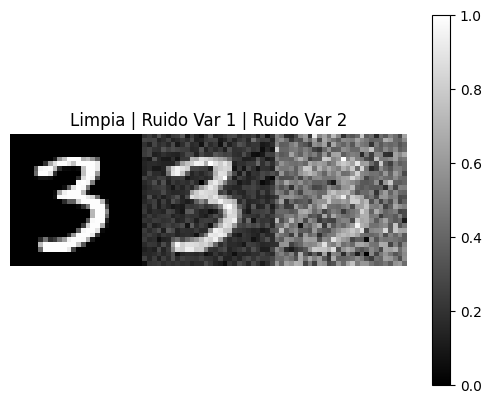

Ejemplo y_train_digits[0]: 3, ytrain_parity[0]: 1.0


Model: "multi_input_multi_output_cnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_clean_image   │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noisy_image_… │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_noisy_image_… │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_conv1         │ (None, 28, 28,    │        320 │ input_clean_imag… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_conv1        │ (None, 28, 28,    │        320 │ input_noisy_imag… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_conv1        │ (None, 28, 28,    │        320 │ input_noisy_imag… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_pool1         │ (None, 14, 14,    │          0 │ clean_conv1[0][0] │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_pool1        │ (None, 14, 14,    │          0 │ noisy1_conv1[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_pool1        │ (None, 14, 14,    │          0 │ noisy2_conv1[0][… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_conv2         │ (None, 14, 14,    │     18,496 │ clean_pool1[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_conv2        │ (None, 14, 14,    │     18,496 │ noisy1_pool1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_conv2        │ (None, 14, 14,    │     18,496 │ noisy2_pool1[0][… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_pool2         │ (None, 7, 7, 64)  │          0 │ clean_conv2[0][0] │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_pool2        │ (None, 7, 7, 64)  │          0 │ noisy1_conv2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy2_pool2        │ (None, 7, 7, 64)  │          0 │ noisy2_conv2[0][… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ clean_flatten       │ (None, 3136)      │          0 │ clean_pool2[0][0] │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ noisy1_flatten      │ (None, 3136)      │          0 │ noisy1_pool2[0][

 Total params: 1,262,219 (4.81 MB)

 Trainable params: 1,262,219 (4.81 MB)

 Non-trainable params: 0 (0.00 B)


Entrenando el modelo CNN multi-entrada/salida...
Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.7259 - output_digit_pred_accuracy: 0.8090 - output_digit_pred_loss: 0.5908 - output_parity_pred_accuracy: 0.8687 - output_parity_pred_loss: 0.2703 - val_loss: 0.0856 - val_output_digit_pred_accuracy: 0.9804 - val_output_digit_pred_loss: 0.0660 - val_output_parity_pred_accuracy: 0.9863 - val_output_parity_pred_loss: 0.0383
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - loss: 0.1359 - output_digit_pred_accuracy: 0.9693 - output_digit_pred_loss: 0.1051 - output_parity_pred_accuracy: 0.9782 - output_parity_pred_loss: 0.0617 - val_loss: 0.0693 - val_output_digit_pred_accuracy: 0.9849 - val_output_digit_pred_loss: 0.0532 - val_output_parity_pred_accuracy: 0.9898 - val_output_parity_pred_loss: 0.0315
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0935 - output_digit_pred_accuracy: 0.9771 - output_digit_pred_loss: 0.0724 - output_parity_pred_accuracy: 0.9860

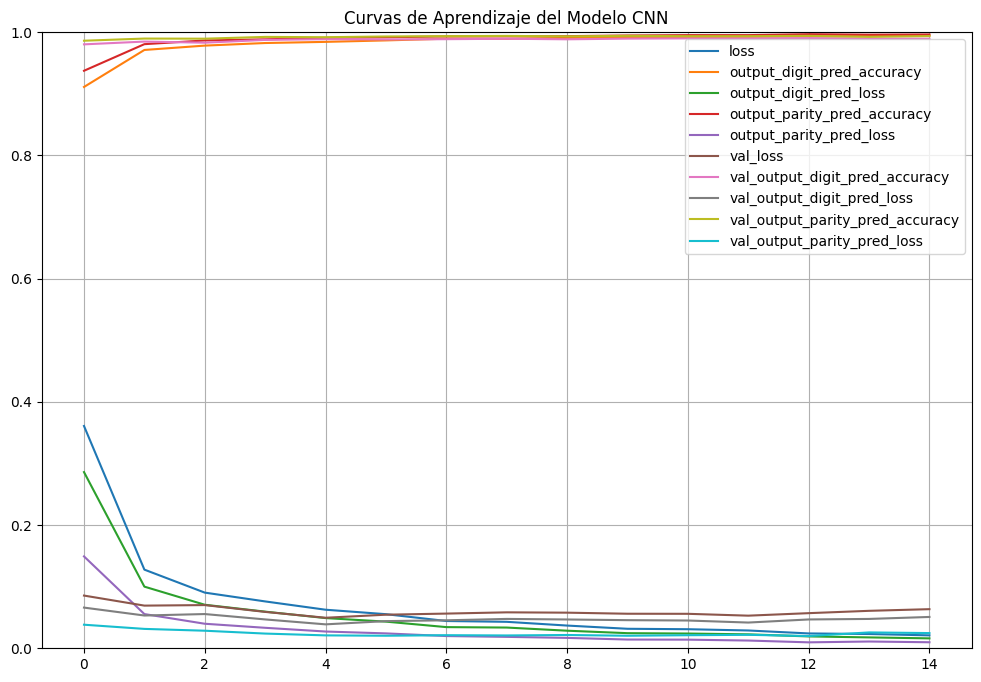

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Ejemplo de predicción - Dígito Real: 7, Predicho: 7
Ejemplo de predicción - Paridad Real: 1.0, Predicho: 1


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# --- Carga y preprocesamiento de datos MNIST (de tu celda [23] y [24]) ---
# Esto asume que las celdas [23] y [24] ya se ejecutaron.
# (X_train_digits, y_train_digits), (X_test_digits, y_test_digits) = tf.keras.datasets.mnist.load_data()
# X_train_digits, X_valid_digits = X_train_digits[:-55000], X_train_digits[-55000:] # Esto es incorrecto, debería ser un split menor. Ej: 50000/10000
# y_train_digits, y_valid_digits = y_train_digits[:-55000], y_train_digits[-55000:]

# Corregir el split de datos MNIST para un tamaño de entrenamiento razonable
(X_train_full_digits, y_train_full_digits), (X_test_digits, y_test_digits) = tf.keras.datasets.mnist.load_data()
X_valid_digits, X_train_digits = X_train_full_digits[:10000], X_train_full_digits[10000:]
y_valid_digits, y_train_digits = y_train_full_digits[:10000], y_train_full_digits[10000:]


X_train_digits = X_train_digits[..., np.newaxis]/255.
X_valid_digits = X_valid_digits[..., np.newaxis]/255.
X_test_digits = X_test_digits[..., np.newaxis]/255.
print(f"Shapes MNIST: Train: {X_train_digits.shape}, Valid: {X_valid_digits.shape}, Test: {X_test_digits.shape}")

# Crear entradas con y sin ruido (de tu celda [24])
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01, 0.25] # Varianzas del ruido
clean_train_input = X_train_digits
clean_valid_input = X_valid_digits
clean_test_input  = X_test_digits

noisy_train_inputs = []
noisy_valid_inputs = []
noisy_test_inputs  = []

for var_i in var_:
    # Ruido para TRAIN
    dim = clean_train_input.shape
    tmp_train = clean_train_input + (np.sqrt(var_i) * np.random.randn(*dim))
    tmp_train = MinMaxScaler().fit_transform(tmp_train.reshape(dim[0], -1).T).T.reshape(dim)
    noisy_train_inputs.append(tmp_train)

    # Ruido para VALID
    dim = clean_valid_input.shape
    tmp_valid = clean_valid_input + (np.sqrt(var_i) * np.random.randn(*dim))
    tmp_valid = MinMaxScaler().fit_transform(tmp_valid.reshape(dim[0], -1).T).T.reshape(dim)
    noisy_valid_inputs.append(tmp_valid)

    # Ruido para TEST
    dim = clean_test_input.shape
    tmp_test = clean_test_input + (np.sqrt(var_i) * np.random.randn(*dim))
    tmp_test = MinMaxScaler().fit_transform(tmp_test.reshape(dim[0], -1).T).T.reshape(dim)
    noisy_test_inputs.append(tmp_test)

# Lista final de inputs para el modelo
inputs_train_list = [clean_train_input, noisy_train_inputs[0], noisy_train_inputs[1]]
inputs_valid_list = [clean_valid_input, noisy_valid_inputs[0], noisy_valid_inputs[1]]
inputs_test_list  = [clean_test_input,  noisy_test_inputs[0],  noisy_test_inputs[1]]

# Visualizar ejemplo (de tu celda [24])
plt.imshow(np.hstack([inputs_train_list[0][0,:,:,0], inputs_train_list[1][0,:,:,0], inputs_train_list[2][0,:,:,0]]), cmap='gray')
plt.title("Limpia | Ruido Var 1 | Ruido Var 2")
plt.axis('off')
plt.colorbar()
plt.show()

# --- Salidas: Dígito y Par/Impar ---
# y_train_digits, y_valid_digits, y_test_digits ya están definidos
ytrain_parity = (y_train_digits % 2).astype(np.float32)
yvalid_parity = (y_valid_digits % 2).astype(np.float32)
ytest_parity  = (y_test_digits % 2).astype(np.float32)

print(f"Ejemplo y_train_digits[0]: {y_train_digits[0]}, ytrain_parity[0]: {ytrain_parity[0]}")

# --- Definir Arquitectura CNN Funcional ---
tf.keras.backend.clear_session()
input_shape_digits = (28, 28, 1)

def create_cnn_branch(input_tensor, name_prefix):
    """Crea una rama convolucional."""
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same', name=f"{name_prefix}_conv1")(input_tensor)
    x = layers.MaxPooling2D((2, 2), name=f"{name_prefix}_pool1")(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name=f"{name_prefix}_conv2")(x)
    x = layers.MaxPooling2D((2, 2), name=f"{name_prefix}_pool2")(x)
    x = layers.Flatten(name=f"{name_prefix}_flatten")(x)
    return x

# Entradas
input_clean = keras.Input(shape=input_shape_digits, name='input_clean_image')
input_noisy1 = keras.Input(shape=input_shape_digits, name='input_noisy_image_v1')
input_noisy2 = keras.Input(shape=input_shape_digits, name='input_noisy_image_v2')

# Ramas CNN
branch_clean = create_cnn_branch(input_clean, 'clean')
branch_noisy1 = create_cnn_branch(input_noisy1, 'noisy1')
branch_noisy2 = create_cnn_branch(input_noisy2, 'noisy2')

# Concatenar características de las ramas
concatenated_features = layers.concatenate([branch_clean, branch_noisy1, branch_noisy2], name='concatenate_features')

# Capas densas comunes después de la concatenación
x = layers.Dense(128, activation='relu', name='common_dense_1')(concatenated_features)
x = layers.Dropout(0.5, name='common_dropout')(x) # Dropout para regularización

# Salidas
output_digit = layers.Dense(10, activation='softmax', name='output_digit_pred')(x) # Predicción del dígito
output_parity = layers.Dense(1, activation='sigmoid', name='output_parity_pred')(x) # Predicción par/impar

# Crear el modelo
cnn_model = keras.Model(
    inputs=[input_clean, input_noisy1, input_noisy2],
    outputs=[output_digit, output_parity],
    name="multi_input_multi_output_cnn"
)

# Resumen y diagrama del modelo
cnn_model.summary()
keras.utils.plot_model(cnn_model, show_shapes=True, show_layer_activations=True)

# --- Compilar el Modelo ---
cnn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss={
        'output_digit_pred': 'sparse_categorical_crossentropy', # y_train_digits es ordinal
        'output_parity_pred': 'binary_crossentropy' # ytrain_parity es 0 o 1
    },
    loss_weights={ # Opcional: dar más peso a una de las pérdidas
        'output_digit_pred': 1.0,
        'output_parity_pred': 0.5
    },
    metrics={
        'output_digit_pred': ['accuracy'],
        'output_parity_pred': ['accuracy']
    }
)

# --- Entrenar el Modelo ---
print("\nEntrenando el modelo CNN multi-entrada/salida...")
history_cnn = cnn_model.fit(
    inputs_train_list, # Lista de arrays de numpy para las entradas
    {'output_digit_pred': y_train_digits, 'output_parity_pred': ytrain_parity}, # Diccionario para las salidas
    epochs=15, # Aumentar épocas para mejor convergencia
    batch_size=64,
    validation_data=(
        inputs_valid_list,
        {'output_digit_pred': y_valid_digits, 'output_parity_pred': yvalid_parity}
    ),
    verbose=1
)

# --- Evaluar el Modelo ---
print("\nEvaluando el modelo...")
results_cnn = cnn_model.evaluate(
    inputs_test_list,
    {'output_digit_pred': y_test_digits, 'output_parity_pred': ytest_parity},
    verbose=0
)

print("\nResultados de la Evaluación en Test:")
for i, metric_name in enumerate(cnn_model.metrics_names):
    print(f"{metric_name}: {results_cnn[i]:.4f}")

# --- Graficar Curvas de Aprendizaje ---
import pandas as pd
pd.DataFrame(history_cnn.history).plot(figsize=(12, 8))
plt.grid(True)
plt.gca().set_ylim(0, max(1, pd.DataFrame(history_cnn.history)['loss'].max())) # Ajustar Y-lim
plt.title("Curvas de Aprendizaje del Modelo CNN")
plt.show()

# --- Hacer predicciones (ejemplo) ---
predictions = cnn_model.predict(inputs_test_list)
pred_digits = np.argmax(predictions[0], axis=1) # Salida de dígitos
pred_parity = (predictions[1] > 0.5).astype(int).flatten() # Salida de paridad

print(f"\nEjemplo de predicción - Dígito Real: {y_test_digits[0]}, Predicho: {pred_digits[0]}")
print(f"Ejemplo de predicción - Paridad Real: {ytest_parity[0]}, Predicho: {pred_parity[0]}")